<h1>Using Word2Vec on Trump's RNC Speech</h1>
<h4>By Joseph J. Bautista</h4>
<br/>
<p>Here I used Word2Vec from the Gensim API on Donald Trump's speech at the RNC. I seek to see which words cluster together by using TSNE to reduce the dimensions of the word embeddings into two. My copy of the speech was obtained form Politico <a href="https://www.politico.com/story/2016/07/full-transcript-donald-trump-nomination-acceptance-speech-at-rnc-225974">here</a>.

## Importing Libraries

In [1]:
from __future__ import print_function

import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

%matplotlib inline

/Users/JosephBautista/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading the Speech

In [2]:
raw_corpus = open("trump_speech.txt", "r")
raw_corpus = str(raw_corpus.read())
raw_corpus = raw_corpus.lower()

tokenizer = RegexpTokenizer(r'\w+')
raw_corpus = ' '.join(tokenizer.tokenize(raw_corpus))

raw_corpus = re.sub(r'[^\x00-\x7F]+', ' ', raw_corpus) # replaces non-ascii to whitespace
raw_corpus = raw_corpus.strip()

## Creating a List of Words and Helper Dictionaries

In [3]:
words = []
for word in raw_corpus.split():
    if "$" in word:
        word = word.strip("$")
        word = "USD {}".format(word)
    if word.isalnum():
        words.append(word)

vocab_size = len(words)
word2int = {}
int2word = {}
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

## Further Preprocessing and Creating the Input for Word2Vec

In [4]:
raw_corpus = raw_corpus.replace("\n", "").replace(",", "").replace(":", "")
raw_sentences = raw_corpus.split(".")

sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

<h2>Word2Vec Implementation</h2>
<p>Read more about Word2Vec as implemented by the Gensim API <a href="https://radimrehurek.com/gensim/models/word2vec.html">here</a></p>

In [5]:
w2v = Word2Vec(sentences, size=200, window=5, min_count=2, workers=20)
w2v.train(sentences, total_examples=len(sentences), epochs=100)

237184

In [6]:
w2v.wv.most_similar(positive="clinton", topn=6)

[('hillary', 0.9938552379608154),
 ('bill', 0.9253090620040894),
 ('mass', 0.9097120761871338),
 ('legacy', 0.8972773551940918),
 ('is', 0.8712427616119385),
 ('policy', 0.8498416543006897)]

## Plotting the Results

In [7]:
vocab = []
stop_words = set(stopwords.words('english'))
for word in list(w2v.wv.vocab):
    if word not in stop_words:
        vocab.append(word)

X = w2v[vocab]

/Users/JosephBautista/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [8]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [9]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.head()

,x,y
four,12.640636,20.296276
go,-15.727677,-12.084027
children,1.596884,15.982879
whose,5.345274,-3.424517
number,0.094350,10.900060


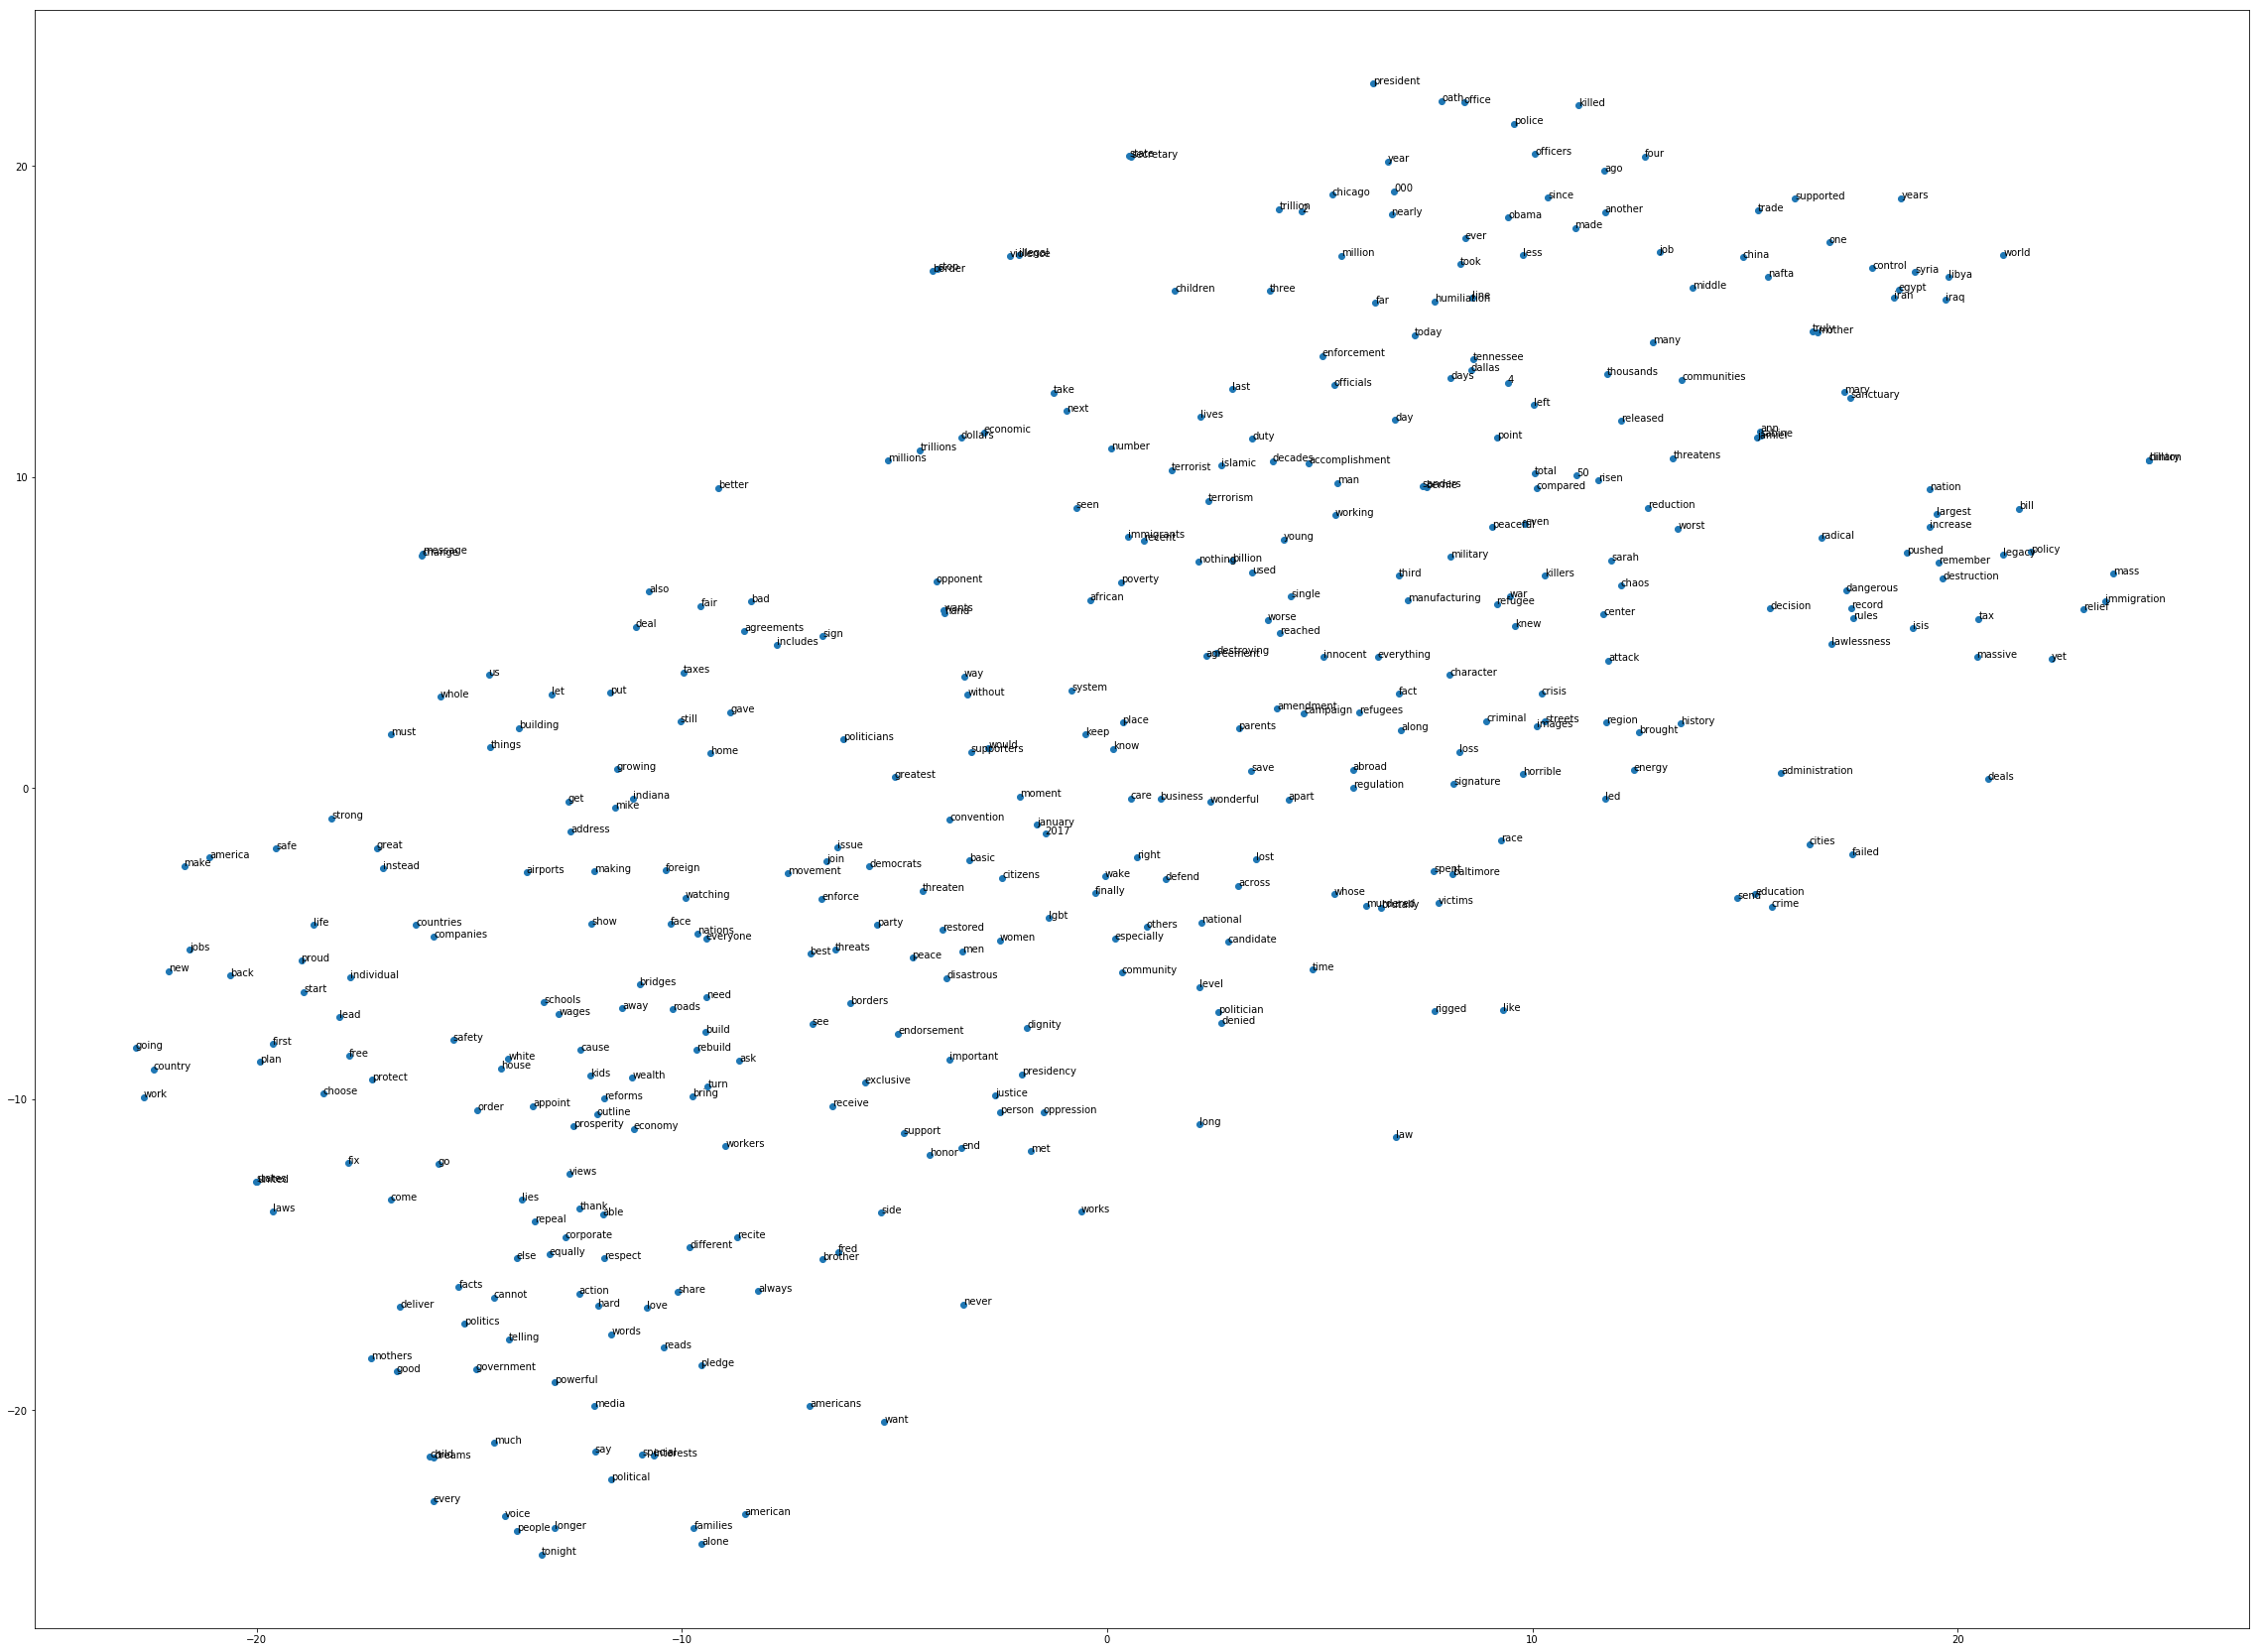

In [10]:
plt.figure(figsize=(40,30))

plt.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    plt.annotate(word, pos)